In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('salaray_data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,state,same_state,age,python_yn,excel_yn,spark_yn,ml_yn,sql_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\r\n,NM,0,47,1,1,0,1,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\r\n,MD,0,36,1,0,0,1,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\r\n,FL,1,10,1,1,1,1,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\r\n,WA,1,55,1,0,0,1,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\r\n,NY,1,22,1,1,0,1,1


# Data Cleaning

In [3]:
print(df['Job Title'].to_string())

0                                         Data Scientist
1                              Healthcare Data Scientist
2                                         Data Scientist
3                                         Data Scientist
4                                         Data Scientist
5                                         Data Scientist
6                                         Data Scientist
7                                         Data Scientist
8                                     Research Scientist
9                                         Data Scientist
10                                        Data Scientist
11                                        Data Scientist
12                     Staff Data Scientist - Technology
13                                          Data Analyst
14                                        Data Scientist
15                                       Data Engineer I
16                               Scientist I/II, Biology
17                             

In [4]:
Data Scientist
Staff Data Scientist
Senior Data Scientist
Data Scientist SR
Sr Data Scientist
Sr. Data Scientist
Staff Data Scientist
Lead Data Scientist
Principal Data Scientist

VP, Data Science
Director, Data Science
Director - Data, Privacy and AI Governance

Jr. Business Data Analyst
Business Data Analyst
Business Intelligence Analyst
Marketing Data Analyst
Corporate Risk Data Analyst

Junior Data Analyst
Associate Data Analyst
Data Analyst
Senior Data Analyst

Machine Learning Expert
Machine Learning Engineer
Senior Machine Learning (ML) Engineer
Staff Machine Learning Engineer

Associate Data Engineer
Data Engineer
Senior Data Engineer
Sr. Data Engineer
Staff Data Engineer
Lead Data Engineer
Big Data Engineer
Lead Big Data Engineer

Data Analytics Project Manager
Data Analytics Manager
BI & Platform Analytics Manager
Analytics Manager - Data Mart

Salesforce Analytics Consultant

SyntaxError: invalid syntax (<ipython-input-4-3fcf9f0efc66>, line 1)

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'big data engineer' in title.lower():
        return 'big data engineer'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'data analyst' in title.lower() or 'analyst' in title.lower():
        return 'data analyst'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'vp, ' in title.lower():
        return 'vp'
    else:
        return 'na'
    
    
    
    
def seniority(title):
    if  'lead' in title.lower() or 'Manager' in title.lower() or 'vp ' in title.lower() or 'director' in title.lower():
        return 'lead'
    elif 'sr ' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'staff' in title.lower():
        return 'senior'
    elif 'jr.' in title.lower() or 'jr ' in title.lower() or 'junior' in title.lower() or 'associate' in title.lower():
        return 'junior'
    else:
        return 'na'

## applying functions

In [6]:

df['job_simp']=df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

data scientist    279
na                182
data engineer     119
data analyst      102
manager            22
mle                22
director           14
vp                  2
Name: job_simp, dtype: int64

In [7]:
# print(df[['job_simp','Job Title']].to_string())

#checking out 'na' parts
print(df[df['job_simp']=='na'][['job_simp','Job Title']].to_string())

    job_simp                                                                                           Job Title
8         na                                                                                  Research Scientist
16        na                                                                             Scientist I/II, Biology
43        na                                                                                           Scientist
48        na                                                                         Spectral Scientist/Engineer
69        na                                                                         R&D Data Analysis Scientist
70        na                                                                                Analytics Consultant
72        na                                                                                           Scientist
77        na                                                                                  Re

In [8]:
#applying functions
df['seniority']=df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        485
senior    191
lead       39
junior     27
Name: seniority, dtype: int64

In [9]:
df.state.value_counts()

 CA    152
 MA    103
 NY     72
 VA     41
 IL     40
 MD     35
 PA     33
 TX     28
 NC     21
 WA     21
 NJ     17
 FL     16
 OH     14
 TN     13
 CO     11
 DC     11
 WI     10
 UT     10
 IN     10
 AZ      9
 MO      9
 AL      8
 DE      6
 KY      6
 GA      6
 MI      6
 CT      5
 IA      5
 NE      4
 LA      4
 OR      4
 KS      3
 NM      3
 ID      2
 MN      2
 RI      1
 SC      1
Name: state, dtype: int64

## Job description length

In [10]:


df['desc_len']=df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2555
1      4828
2      3495
3      3926
4      2748
       ... 
737    6219
738    6167
739    3107
740    1678
741    3710
Name: desc_len, Length: 742, dtype: int64

## Competitor Count

In [11]:


# print(df.columns)

# print(df[['Company Name','Competitors']].to_string())  # checking out data and company
print(df['Competitors'].to_string())  # checking out data   (Competitors are separated by comma)


0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
5                      Digital Realty, CoreSite, Equinix
6                                                     -1
7                                                     -1
8                                                     -1
9                              Clicktripz, SmarterTravel
10                                                    -1
11                                                    -1
12                      Target, Costco Wholesale, Amazon
13                                                    -1
14                              Novartis, Baxter, Pfizer
15                                                    -1
16          bluebird bio, Agios Pharmaceuticals, Celgene
17                             

In [12]:
# df['Competitors'].apply(lambda x: x.split(','))   #observing

df['num_comp']=df['Competitors'].apply(lambda x: len(x.split(',')) if x!='-1' else 0)
df['num_comp'].value_counts()

0    460
3    228
2     41
1     12
4      1
Name: num_comp, dtype: int64

## Hourky wage to annual

In [13]:

df.columns
print(df[df['hourly']==1][['Salary Estimate','hourly','employer_provided', 'min_salary', 'max_salary', 'avg_salary']].to_string())

                               Salary Estimate  hourly  employer_provided  min_salary  max_salary  avg_salary
165           $17-$24 Per Hour(Glassdoor est.)       1                  0          17          24        20.5
177           $21-$34 Per Hour(Glassdoor est.)       1                  0          21          34        27.5
197           $18-$25 Per Hour(Glassdoor est.)       1                  0          18          25        21.5
202           $21-$34 Per Hour(Glassdoor est.)       1                  0          21          34        27.5
210           $15-$25 Per Hour(Glassdoor est.)       1                  0          15          25        20.0
246           $17-$24 Per Hour(Glassdoor est.)       1                  0          17          24        20.5
271           $21-$34 Per Hour(Glassdoor est.)       1                  0          21          34        27.5
337           $18-$25 Per Hour(Glassdoor est.)       1                  0          18          25        21.5
345       

In [14]:
#Annual rate (in terms of 1000)=hourly rate*2

df['min_salary']=df.apply(lambda x: x.min_salary*2 if x['hourly']==1 else x.min_salary,axis=1) 
df['max_salary']=df.apply(lambda x: x.max_salary*2 if x['hourly']==1 else x.max_salary,axis=1)
df['avg_salary']=df.apply(lambda x: (x.min_salary+x.max_salary)/2 if x['hourly']==1 else x.avg_salary,axis=1)

In [15]:
df[df['hourly']==1][['min_salary','max_salary','avg_salary']]

,min_salary,max_salary,avg_salary
165,34,48,41.0
177,42,68,55.0
197,36,50,43.0
202,42,68,55.0
210,30,50,40.0
246,34,48,41.0
271,42,68,55.0
337,36,50,43.0
345,48,78,63.0
357,42,68,55.0


## Remove new line from Comapany name

In [16]:


df.columns
df['company_txt']=df['company_txt'].apply(lambda x: x.strip())

In [17]:
df['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

# Visualization

In [18]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,excel_yn,spark_yn,ml_yn,sql_yn,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,101.434636,0.557951,46.591644,0.528302,0.522911,0.225067,0.424528,0.512129,3910.172507,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,37.546122,0.496965,53.778815,0.499535,0.499812,0.417908,0.494605,0.500190,1533.827777,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,1.000000,0.000000,1.000000,1.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


In [19]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'state', 'same_state', 'age', 'python_yn', 'excel_yn',
       'spark_yn', 'ml_yn', 'sql_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

## Histograms

<AxesSubplot:>

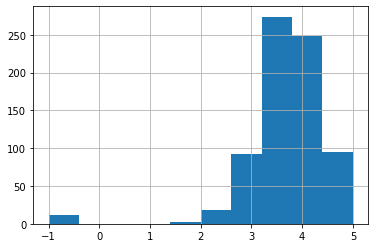

In [20]:
df.Rating.hist()

#it seems Ratings follows a normal distribution

<AxesSubplot:>

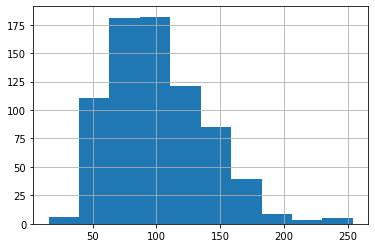

In [21]:
df.avg_salary.hist()


#it seems avg_salary follows a normal distribution

<AxesSubplot:>

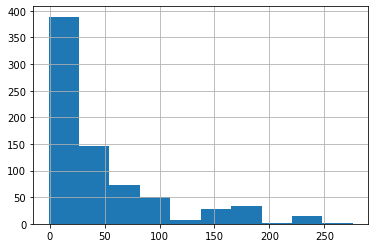

In [22]:
df.age.hist()

#it seems age doesn't follow a normal distribution. It follows an exponential distribution. If want to use it in regression, we need to normalize it.

<AxesSubplot:>

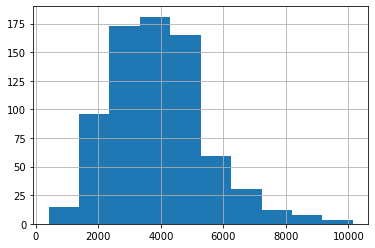

In [23]:
df.desc_len.hist()

#it seems desc_len follows a normal distribution.

## Box plots

<AxesSubplot:>

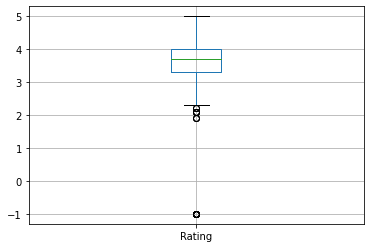

In [24]:
df.boxplot(column='Rating')

<AxesSubplot:>

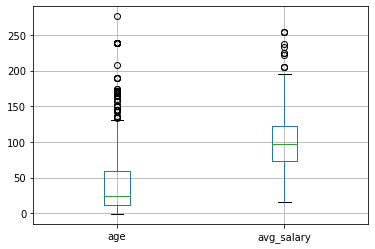

In [25]:
df.boxplot(column=['age','avg_salary'])

<AxesSubplot:>

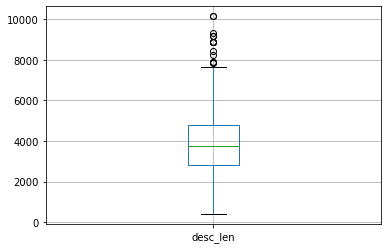

In [26]:
df.boxplot(column='desc_len')

## Heatmap

In [27]:
df[['age','avg_salary','Rating','desc_len','num_comp']].corr()

,age,avg_salary,Rating,desc_len,num_comp
age,1.000000,0.021996,0.021655,0.165090,0.126687
avg_salary,0.021996,1.000000,0.012517,0.069742,0.083263
Rating,0.021655,0.012517,1.000000,-0.012631,0.027190
desc_len,0.165090,0.069742,-0.012631,1.000000,0.104846
num_comp,0.126687,0.083263,0.027190,0.104846,1.000000


<AxesSubplot:>

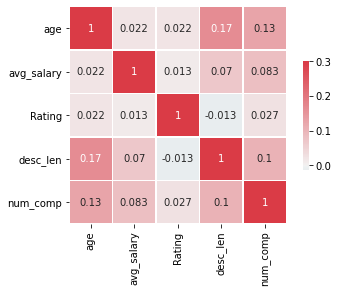

In [28]:
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),cmap=cmap,vmax=.3,center=0,square=True,linewidth=0.5,
            cbar_kws={'shrink':0.5},annot=True)

It seems **age, desc_len, avg_salaray** and **num_comp** are positively correlated

## Working with categorical variables

### Bar charts

In [29]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'state', 'same_state', 'age', 'python_yn', 'excel_yn',
       'spark_yn', 'ml_yn', 'sql_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [30]:
df_cat=df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector','Revenue','company_txt','state', 'same_state','python_yn', 'excel_yn',
       'spark_yn', 'ml_yn', 'sql_yn', 'job_simp', 'seniority']]

Graph for Location. Total= 200


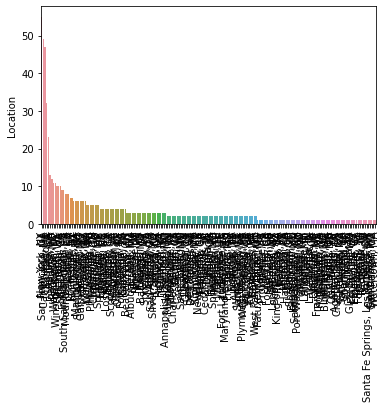

Graph for Headquarters. Total= 198


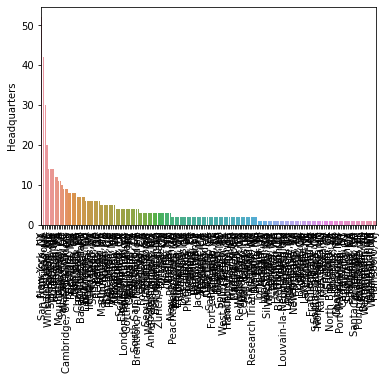

Graph for Size. Total= 9


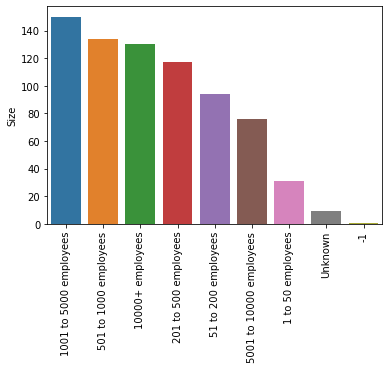

Graph for Type of ownership. Total= 11


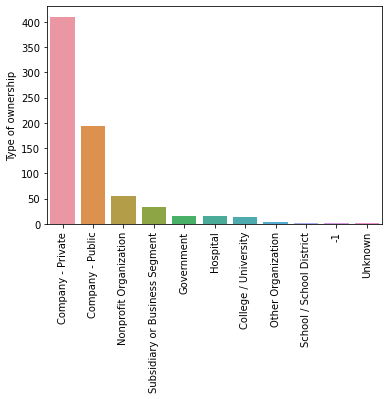

Graph for Industry. Total= 60


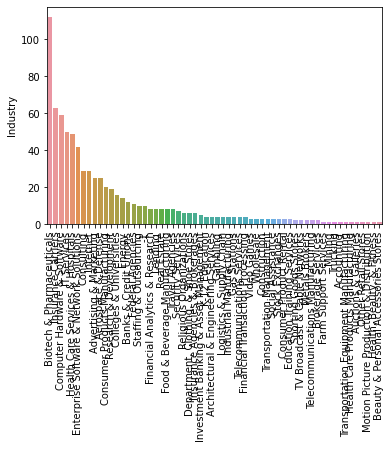

Graph for Sector. Total= 25


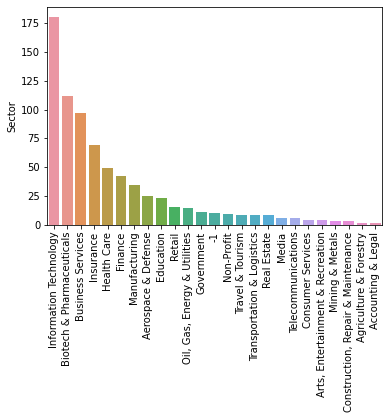

Graph for Revenue. Total= 14


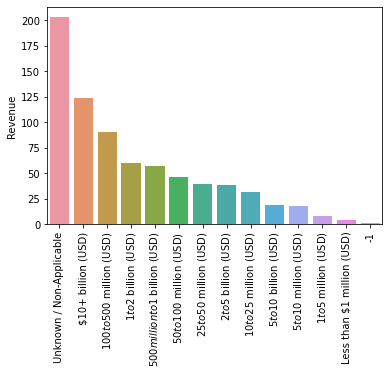

Graph for company_txt. Total= 343


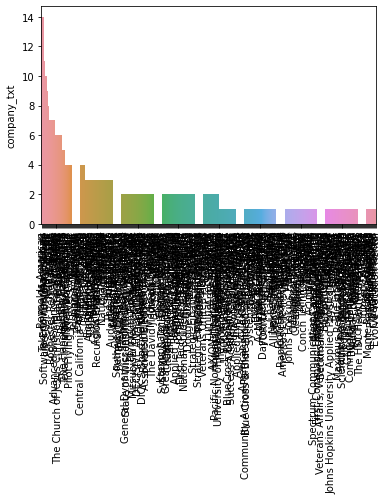

Graph for state. Total= 37


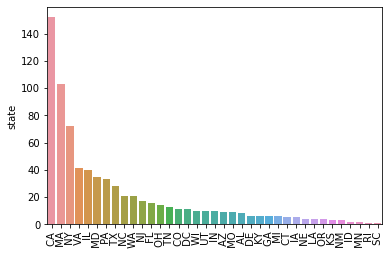

Graph for same_state. Total= 2


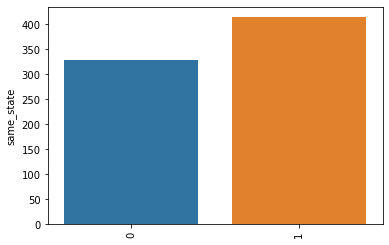

Graph for python_yn. Total= 2


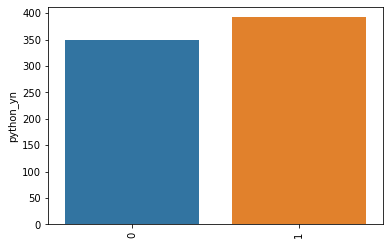

Graph for excel_yn. Total= 2


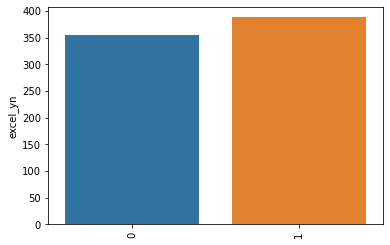

Graph for spark_yn. Total= 2


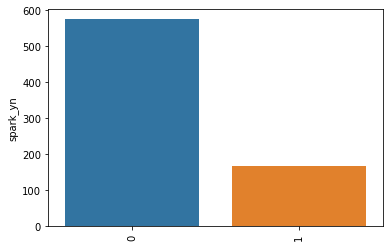

Graph for ml_yn. Total= 2


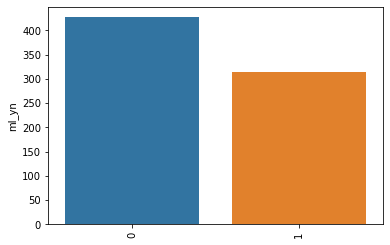

Graph for sql_yn. Total= 2


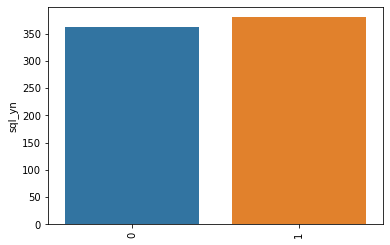

Graph for job_simp. Total= 8


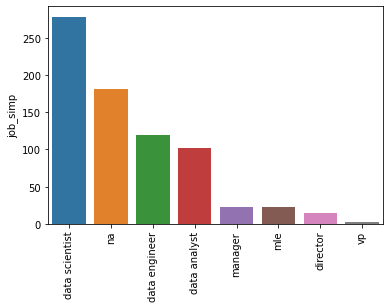

Graph for seniority. Total= 4


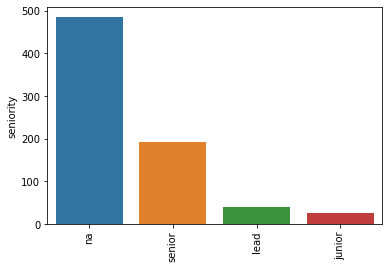

In [31]:
for i in df_cat.columns:
    cat_num=df_cat[i].value_counts()
    print(f"Graph for {i}. Total= {len(cat_num)}")
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

Graph for Location. Total= 20


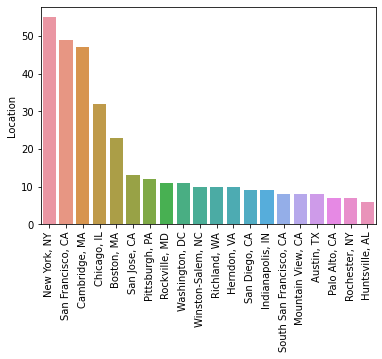

Graph for Headquarters. Total= 20


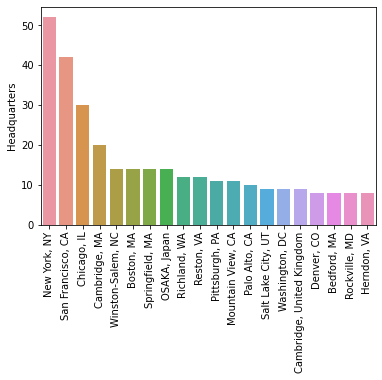

Graph for Industry. Total= 20


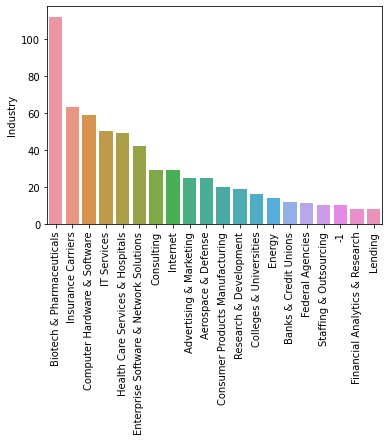

Graph for company_txt. Total= 20


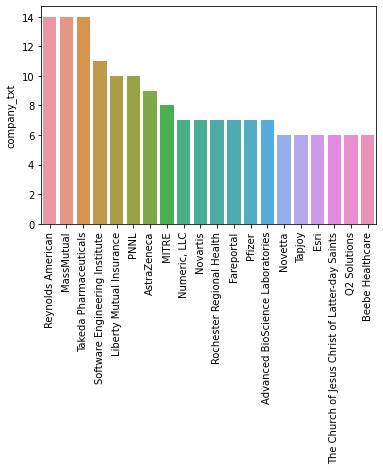

In [32]:
for i in df_cat[['Location', 'Headquarters','Industry','company_txt']].columns:
    cat_num=df_cat[i].value_counts()[:20]
    print(f"Graph for {i}. Total= {len(cat_num)}")
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

### Pivot tables

In [33]:
#like Group by
pd.pivot_table(df,index='job_simp',values='avg_salary').sort_values(by='avg_salary',ascending=False)

,avg_salary
job_simp,
director,168.607143
mle,126.431818
vp,124.500000
data scientist,117.564516
data engineer,105.403361
na,87.565934
manager,84.022727
data analyst,66.122549


In [34]:
pd.pivot_table(df,index=['job_simp','seniority'],values='avg_salary').sort_values(by=['job_simp','avg_salary'],ascending=[True,False])

avg_salary
job_simp       seniority            
data analyst   senior      82.020833
               lead        64.666667
               na          62.939394
               junior      47.555556
data engineer  lead       159.150000
               senior     118.441176
               na          93.061644
               junior      65.500000
data scientist lead       158.300000
               senior     133.040541
               na         110.133508
               junior      84.250000
director       lead       168.607143
manager        na          84.022727
mle            senior     145.000000
               na         113.576923
na             lead       110.000000
               senior     105.490000
               na          80.690678
               junior      76.750000
vp             na         124.500000

In [35]:
pd.pivot_table(df,index='state',values='avg_salary').sort_values(by='avg_salary',ascending=False)   #pivot table uses average as aggregation function by default

,avg_salary
state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,107.412621
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


Why average salary of NY is less than few other states though living cost is higher in there?

In [36]:
print(pd.pivot_table(df,index=['state','job_simp'],values='avg_salary',aggfunc='count').sort_values(by='state',ascending=False).to_string())

                      avg_salary
state job_simp                  
 WI   na                       4
      data scientist           3
      data analyst             3
 WA   na                       1
      data scientist          17
      data analyst             3
 VA   na                       5
      mle                      2
      data scientist          18
      data engineer           10
      data analyst             6
 UT   data engineer            3
      data analyst             4
      data scientist           3
 TX   na                       7
      data scientist          13
      data engineer            8
 TN   data scientist           1
      data engineer           10
      data analyst             2
 SC   na                       1
 RI   data analyst             1
 PA   manager                  3
      data engineer            1
      data scientist           6
      data analyst             8
      mle                      7
      na                       8
 OR   data

It seems NY hires more Data Analyst which is the reason for less average salary

In [37]:
pd.pivot_table(df[df.job_simp=='data scientist'],index='state',values='avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [38]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'state', 'same_state', 'age', 'python_yn', 'excel_yn',
       'spark_yn', 'ml_yn', 'sql_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [39]:
df_pivot=df[['Rating','Type of ownership', 'Industry', 'Sector', 'Revenue','hourly', 'employer_provided','python_yn', 'excel_yn',
       'spark_yn', 'ml_yn', 'sql_yn','num_comp','avg_salary']]

In [40]:
for i in df_pivot.columns[:-1]:  #excluding avg_salary
    print(pd.pivot_table(df_pivot,index=i,values='avg_salary').sort_values(by='avg_salary',ascending=False))

        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 4.0    107.170213
 3.2    106.928571
 3.7    105.680328
 3.5    104.897959
 4.7    103.983871
 3.3    103.897436
 4.3    102.468750
 4.2    100.442308
 2.2     97.750000
 3.8     97.418033
 4.6     97.250000
 2.1     95.900000
 3.4     93.465909
 3.6     89.945652
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 2.7     85.178571
 2.8     83.928571
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
                                avg_salary
Type of ownership                         
-1                              117.500000
Company - Public                111.033679
Subsidiary or Business Segment  110.573529
College / University            107.615385
Company - Private               102.060976
Government                       85.633333
School / School District     

In [41]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'state', 'same_state', 'age', 'python_yn', 'excel_yn',
       'spark_yn', 'ml_yn', 'sql_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [42]:
#saving the file
df.to_csv('salaray_data_eda.csv',index=False)